<a href="https://www.kaggle.com/code/imeldamaretta/modelml-yolov8-ipynb?scriptVersionId=236702563" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Mount Google Drive

Only do this if you're using Colab

In [1]:
#from google.colab import drive

#drive.mount('/content/drive')

# Install Necessary Library

In [2]:
'''! pip install ultralytics

! pip install tensorflow

! pip install keras

! pip install roboflow'''

'! pip install ultralytics\n\n! pip install tensorflow\n\n! pip install keras\n\n! pip install roboflow'

# Importing Library

In [3]:
'''from ultralytics import YOLO

import matplotlib.pyplot as plt

import tensorflow as tf

import cv2'''

'from ultralytics import YOLO\n\nimport matplotlib.pyplot as plt\n\nimport tensorflow as tf\n\nimport cv2'

# Downloading and Extracting the Dataset in Zip File

## Importing the Dataset from Roboflow

Importing the dataset straight from Roboflow will automatically extract the zip file

In [4]:
# from google.colab import userdata

#RF_TOKEN = userdata.get('RF_TOKEN')

In [5]:
!pip install roboflow

from roboflow import Roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 58.9 MB/s eta 0:00:00


In [6]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
RF_TOKEN = user_secrets.get_secret("RF_TOKEN")

In [7]:
rf = Roboflow(api_key=RF_TOKEN)
project = rf.workspace("florys-ijzit").project("flower-disease-aoxpb")
version = project.version(9)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Flower-Disease-9 in yolov8:: 100%|██████████| 7182/7182 [00:01<00:00, 6965.33it/s]


# Training the Model

In [8]:
!pip install --upgrade ray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 MB 24.9 MB/s eta 0:00:00
  Attempting uninstall: ray
    Found existing installation: ray 2.24.0
    Uninstalling ray-2.24.0:
      Successfully uninstalled ray-2.24.0


In [9]:
!pip install git+https://github.com/ultralytics/ultralytics.git@main

  Cloning https://github.com/ultralytics/ultralytics.git (to revision main) to /tmp/pip-req-build-hbjoxilt
  Running command git clone --filter=blob:none --quiet https://github.com/ultralytics/ultralytics.git /tmp/pip-req-build-hbjoxilt
  Resolved https://github.com/ultralytics/ultralytics.git to commit e700646ea265326aad8822aa6db2a7d4fabacf85
  Installing build dependencies ... - \ | / - done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
  Created wheel for ultralytics: filename=ultralytics-8.3.119-py3-none-any.whl size=1005424 sha256=1d7c4ac54eb5f84bd8976d34e156bf1a8a8e5a83e4598cf28763f8d2ab240217
  Stored in directory: /tmp/pip-ephem-wheel-cache-etf22vkf/wheels/60/db/e5/6abbdd13b4e3d5e2fdcd87690cd8738f842eeb37142fdccb5b
Successfully built ultralytics


In [10]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [11]:
# Load YOLOv8 model
model = YOLO('yolov8n.pt')

# Train on custom dataset
model.train(
    data='/kaggle/working/Flower-Disease-9/data.yaml',
    epochs=100,
    imgsz=640,
    batch=8,
    lr0=0.01,
    lrf=0.01,
    optimizer='SGD',
    save=True
)

100%|██████████| 6.25M/6.25M [00:00<00:00, 82.5MB/s]


Ultralytics 8.3.119 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/Flower-Disease-9/data.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_bo

100%|██████████| 755k/755k [00:00<00:00, 17.5MB/s]


Overriding model.yaml nc=80 with nc=8

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 73.9MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1220.7±309.2 MB/s, size: 45.1 KB)


train: Scanning /kaggle/working/Flower-Disease-9/train/labels... 2978 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2978/2978 [00:03<00:00, 936.20it/s]


train: New cache created: /kaggle/working/Flower-Disease-9/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 348, len(boxes) = 13435. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 721.7±449.0 MB/s, size: 44.1 KB)


val: Scanning /kaggle/working/Flower-Disease-9/valid/labels... 317 images, 3 backgrounds, 0 corrupt: 100%|██████████| 317/317 [00:00<00:00, 550.37it/s]

val: New cache created: /kaggle/working/Flower-Disease-9/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.16G      1.352      2.913      1.512         17        640: 100%|██████████| 373/373 [00:49<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:04<00:00,  4.94it/s]


                   all        317        958      0.324      0.456       0.24      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.39G      1.307      2.172      1.433          9        640: 100%|██████████| 373/373 [00:46<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.41it/s]

                   all        317        958      0.365      0.386      0.334      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.39G      1.295      1.897      1.424         27        640: 100%|██████████| 373/373 [00:45<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.76it/s]

                   all        317        958      0.413      0.351      0.249      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.39G      1.335      1.827      1.451         14        640: 100%|██████████| 373/373 [00:45<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.92it/s]


                   all        317        958      0.577      0.302      0.401      0.244

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.39G      1.309      1.686      1.424         17        640: 100%|██████████| 373/373 [00:45<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.00it/s]

                   all        317        958      0.352      0.282       0.32      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.39G      1.274      1.603       1.41         10        640: 100%|██████████| 373/373 [00:46<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.84it/s]

                   all        317        958      0.417      0.392      0.394      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.39G      1.264      1.497      1.396         13        640: 100%|██████████| 373/373 [00:46<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.88it/s]


                   all        317        958      0.502      0.417      0.402      0.229

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.39G      1.241      1.464      1.394         14        640: 100%|██████████| 373/373 [00:46<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.13it/s]


                   all        317        958       0.38      0.454      0.433      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.39G      1.233      1.413      1.387         11        640: 100%|██████████| 373/373 [00:45<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.30it/s]

                   all        317        958       0.42      0.419      0.432      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.39G      1.222      1.366      1.379         12        640: 100%|██████████| 373/373 [00:46<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.92it/s]


                   all        317        958      0.367      0.457      0.438      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.39G      1.209      1.319      1.369         21        640: 100%|██████████| 373/373 [00:45<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.29it/s]


                   all        317        958        0.6      0.353      0.455      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.39G      1.206      1.284      1.366         14        640: 100%|██████████| 373/373 [00:45<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.65it/s]

                   all        317        958      0.347      0.483      0.376      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.39G      1.181      1.233      1.342         10        640: 100%|██████████| 373/373 [00:45<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.37it/s]


                   all        317        958      0.608      0.414      0.452      0.279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.39G      1.181      1.214      1.349         17        640: 100%|██████████| 373/373 [00:46<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.32it/s]


                   all        317        958      0.327      0.436        0.4      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.39G      1.168      1.211      1.345          2        640: 100%|██████████| 373/373 [00:45<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.74it/s]


                   all        317        958      0.378      0.368      0.357      0.248

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.39G      1.153      1.164      1.336         13        640: 100%|██████████| 373/373 [00:45<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.53it/s]

                   all        317        958      0.358      0.453      0.432        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.39G      1.153      1.128      1.327         25        640: 100%|██████████| 373/373 [00:46<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.40it/s]


                   all        317        958      0.504      0.404       0.46      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.39G      1.144      1.118       1.33         14        640: 100%|██████████| 373/373 [00:46<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.57it/s]


                   all        317        958      0.599      0.385      0.456      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.39G      1.126       1.09      1.319         13        640: 100%|██████████| 373/373 [00:45<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.44it/s]


                   all        317        958      0.451      0.439      0.476      0.308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.39G      1.121      1.092      1.316         24        640: 100%|██████████| 373/373 [00:45<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.44it/s]


                   all        317        958      0.438      0.423      0.453      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.39G      1.116      1.052       1.31         13        640: 100%|██████████| 373/373 [00:45<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.36it/s]

                   all        317        958      0.531      0.369      0.359      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.39G      1.114      1.061       1.31         15        640: 100%|██████████| 373/373 [00:46<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.05it/s]

                   all        317        958      0.402      0.371      0.414      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.39G      1.108      1.026      1.303         36        640: 100%|██████████| 373/373 [00:45<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.36it/s]


                   all        317        958      0.626      0.406      0.462      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.39G      1.095       1.01      1.294          6        640: 100%|██████████| 373/373 [00:46<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.32it/s]


                   all        317        958      0.423        0.4       0.41      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.39G       1.09     0.9986      1.286         11        640: 100%|██████████| 373/373 [00:45<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.15it/s]

                   all        317        958      0.606      0.401      0.424      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.39G      1.078     0.9774      1.281         15        640: 100%|██████████| 373/373 [00:46<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.61it/s]


                   all        317        958      0.397      0.355      0.394      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.39G      1.067     0.9618      1.281          8        640: 100%|██████████| 373/373 [00:45<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.54it/s]


                   all        317        958       0.48      0.401      0.468      0.313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.39G      1.066     0.9579      1.279         25        640: 100%|██████████| 373/373 [00:46<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.52it/s]


                   all        317        958       0.62      0.354      0.439      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      1.39G      1.065     0.9501      1.279         20        640: 100%|██████████| 373/373 [00:45<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.25it/s]


                   all        317        958      0.566      0.399      0.425      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      1.39G      1.052     0.9277      1.267         13        640: 100%|██████████| 373/373 [00:46<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.19it/s]

                   all        317        958      0.542      0.409      0.399      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.39G      1.061       0.94      1.278         24        640: 100%|██████████| 373/373 [00:45<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.66it/s]


                   all        317        958      0.542      0.423      0.481      0.311

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.39G      1.045     0.9034      1.264         13        640: 100%|██████████| 373/373 [00:46<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.69it/s]


                   all        317        958      0.406      0.455      0.429      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.39G      1.046     0.8947      1.262         19        640: 100%|██████████| 373/373 [00:45<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.37it/s]

                   all        317        958      0.428      0.434      0.464      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.39G       1.04     0.8824      1.255         22        640: 100%|██████████| 373/373 [00:46<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.84it/s]


                   all        317        958      0.361      0.437      0.387      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      1.39G      1.028     0.8677      1.248         18        640: 100%|██████████| 373/373 [00:45<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.35it/s]


                   all        317        958      0.633      0.359      0.463      0.296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.39G      1.025     0.8546      1.248         12        640: 100%|██████████| 373/373 [00:45<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.57it/s]


                   all        317        958      0.534      0.347      0.459      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      1.39G      1.024     0.8551      1.248         24        640: 100%|██████████| 373/373 [00:46<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.35it/s]


                   all        317        958      0.454      0.412      0.458      0.323

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.39G      1.014      0.841      1.243         27        640: 100%|██████████| 373/373 [00:45<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.40it/s]


                   all        317        958      0.494      0.429      0.455       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.39G      1.008     0.8309      1.245         22        640: 100%|██████████| 373/373 [00:45<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.36it/s]

                   all        317        958      0.454      0.421      0.437      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.39G     0.9954     0.8216      1.234          6        640: 100%|██████████| 373/373 [00:46<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.42it/s]

                   all        317        958      0.468      0.371      0.437      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.39G     0.9995     0.8266      1.239          5        640: 100%|██████████| 373/373 [00:45<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.14it/s]

                   all        317        958      0.513      0.378       0.45      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.39G     0.9957     0.8206      1.228         18        640: 100%|██████████| 373/373 [00:46<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.46it/s]

                   all        317        958      0.531      0.388      0.455      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.39G     0.9856     0.7971      1.223         17        640: 100%|██████████| 373/373 [00:46<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.14it/s]

                   all        317        958      0.503      0.422      0.465      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.39G     0.9769     0.7963      1.221         28        640: 100%|██████████| 373/373 [00:46<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.02it/s]

                   all        317        958      0.443      0.387      0.449      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      1.39G      0.989     0.7942      1.223         12        640: 100%|██████████| 373/373 [00:46<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.38it/s]


                   all        317        958      0.468      0.402      0.471      0.318

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      1.39G     0.9693     0.7756      1.218         19        640: 100%|██████████| 373/373 [00:47<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.23it/s]

                   all        317        958      0.391      0.394      0.412      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      1.39G     0.9737     0.7866      1.219         22        640: 100%|██████████| 373/373 [00:46<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.68it/s]


                   all        317        958      0.457      0.438      0.471      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      1.39G     0.9575     0.7614      1.207         26        640: 100%|██████████| 373/373 [00:46<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.38it/s]

                   all        317        958      0.468      0.421      0.463      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      1.39G     0.9563     0.7599      1.206         12        640: 100%|██████████| 373/373 [00:46<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.38it/s]


                   all        317        958      0.414      0.393      0.434      0.301

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      1.39G     0.9633     0.7628      1.208         11        640: 100%|██████████| 373/373 [00:46<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.23it/s]


                   all        317        958      0.435      0.387      0.434      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      1.39G     0.9528     0.7477      1.202         27        640: 100%|██████████| 373/373 [00:46<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.72it/s]

                   all        317        958      0.386      0.437      0.405      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      1.39G     0.9513     0.7417        1.2         22        640: 100%|██████████| 373/373 [00:46<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.26it/s]

                   all        317        958      0.508      0.361      0.451      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      1.39G     0.9483     0.7345      1.199         29        640: 100%|██████████| 373/373 [00:46<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.69it/s]

                   all        317        958      0.366      0.435      0.416      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      1.39G     0.9323     0.7292      1.194         21        640: 100%|██████████| 373/373 [00:47<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.31it/s]


                   all        317        958       0.36       0.42      0.412      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      1.39G     0.9378     0.7217      1.188         31        640: 100%|██████████| 373/373 [00:46<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.28it/s]

                   all        317        958      0.469      0.408      0.464      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      1.39G     0.9255     0.7165      1.192         11        640: 100%|██████████| 373/373 [00:47<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.21it/s]

                   all        317        958       0.38      0.403       0.39      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      1.39G     0.9178     0.7045      1.185         24        640: 100%|██████████| 373/373 [00:46<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.62it/s]

                   all        317        958      0.366      0.411      0.423      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      1.39G     0.9336      0.704       1.19         26        640: 100%|██████████| 373/373 [00:47<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.27it/s]


                   all        317        958      0.566      0.407      0.478      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      1.39G     0.9154     0.6952      1.178         11        640: 100%|██████████| 373/373 [00:46<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.44it/s]


                   all        317        958      0.521      0.401      0.482      0.301

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      1.39G     0.9168     0.6967      1.181         25        640: 100%|██████████| 373/373 [00:46<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.11it/s]

                   all        317        958      0.471      0.417      0.469      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      1.39G     0.9035     0.6929      1.173         24        640: 100%|██████████| 373/373 [00:46<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.37it/s]


                   all        317        958      0.444       0.39      0.458      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      1.39G     0.9006     0.6777       1.17          9        640: 100%|██████████| 373/373 [00:46<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.32it/s]


                   all        317        958      0.459      0.425      0.468      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      1.39G     0.9046     0.6835      1.175          8        640: 100%|██████████| 373/373 [00:47<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.33it/s]


                   all        317        958      0.473      0.443      0.469      0.303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      1.39G     0.8934     0.6864      1.173          8        640: 100%|██████████| 373/373 [00:46<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.42it/s]

                   all        317        958      0.375      0.426      0.414      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      1.39G     0.8974     0.6734       1.17         20        640: 100%|██████████| 373/373 [00:47<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.04it/s]

                   all        317        958      0.442      0.424      0.448      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      1.39G     0.8869     0.6612      1.166         15        640: 100%|██████████| 373/373 [00:46<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.31it/s]


                   all        317        958      0.438      0.425      0.429      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      1.39G     0.8876     0.6588      1.166         12        640: 100%|██████████| 373/373 [00:46<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.13it/s]

                   all        317        958      0.416      0.422      0.439      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      1.39G     0.8866     0.6592       1.16         20        640: 100%|██████████| 373/373 [00:47<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.14it/s]

                   all        317        958      0.465      0.413      0.446      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      1.39G     0.8795     0.6515      1.152         29        640: 100%|██████████| 373/373 [00:47<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.23it/s]

                   all        317        958      0.458      0.422      0.465       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      1.39G     0.8746     0.6486      1.153          7        640: 100%|██████████| 373/373 [00:46<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.23it/s]


                   all        317        958       0.39      0.387      0.404      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      1.39G     0.8818     0.6614      1.165         14        640: 100%|██████████| 373/373 [00:47<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.18it/s]


                   all        317        958       0.49      0.405      0.464      0.313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      1.39G     0.8605      0.639      1.149          8        640: 100%|██████████| 373/373 [00:47<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.19it/s]


                   all        317        958      0.473      0.405      0.464      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      1.39G     0.8601     0.6323       1.15         11        640: 100%|██████████| 373/373 [00:47<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.30it/s]

                   all        317        958      0.459      0.406      0.463      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      1.39G     0.8578     0.6366      1.144         21        640: 100%|██████████| 373/373 [00:47<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.47it/s]

                   all        317        958      0.526      0.339      0.419      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      1.39G     0.8553     0.6184      1.146          9        640: 100%|██████████| 373/373 [00:46<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.12it/s]

                   all        317        958      0.486       0.43      0.473      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      1.39G     0.8459     0.6257      1.143         10        640: 100%|██████████| 373/373 [00:47<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.72it/s]


                   all        317        958      0.441      0.429      0.442      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      1.39G     0.8493     0.6249      1.138          3        640: 100%|██████████| 373/373 [00:47<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.15it/s]

                   all        317        958      0.508      0.323       0.41      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      1.39G     0.8374     0.6115      1.137         14        640: 100%|██████████| 373/373 [00:47<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.22it/s]

                   all        317        958      0.422      0.426      0.448      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      1.39G     0.8382      0.602      1.137         20        640: 100%|██████████| 373/373 [00:46<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.44it/s]

                   all        317        958      0.444      0.416      0.449      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      1.39G     0.8396     0.6133      1.134         16        640: 100%|██████████| 373/373 [00:47<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.80it/s]

                   all        317        958      0.484      0.423      0.469      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      1.39G     0.8312     0.6053       1.13         13        640: 100%|██████████| 373/373 [00:47<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.34it/s]

                   all        317        958      0.465      0.376      0.452      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     82/100      1.39G     0.8301     0.6017      1.128          7        640: 100%|██████████| 373/373 [00:46<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.30it/s]

                   all        317        958       0.43      0.384      0.434      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      1.39G     0.8235     0.6027      1.129         13        640: 100%|██████████| 373/373 [00:46<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.19it/s]

                   all        317        958       0.45        0.4      0.455      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      1.39G     0.8275     0.5961      1.127         22        640: 100%|██████████| 373/373 [00:47<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.29it/s]

                   all        317        958      0.502      0.422      0.468      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      1.39G      0.817     0.5885      1.126         16        640: 100%|██████████| 373/373 [00:47<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.60it/s]


                   all        317        958       0.48       0.38      0.454      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      1.39G     0.8129     0.5819      1.123          8        640: 100%|██████████| 373/373 [00:47<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.28it/s]

                   all        317        958      0.483      0.421      0.467      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      1.39G     0.8126     0.5849       1.12         20        640: 100%|██████████| 373/373 [00:46<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.15it/s]

                   all        317        958      0.459      0.429      0.461      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      1.39G      0.812     0.5855      1.118         22        640: 100%|██████████| 373/373 [00:47<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.17it/s]

                   all        317        958      0.423      0.381      0.439      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      1.39G     0.8038     0.5735      1.117         20        640: 100%|██████████| 373/373 [00:47<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.48it/s]

                   all        317        958      0.425      0.426      0.438      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      1.39G     0.7955     0.5822      1.112         18        640: 100%|██████████| 373/373 [00:47<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.15it/s]

                   all        317        958      0.467      0.369      0.446      0.288


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      1.39G     0.7374     0.4466      1.073         16        640: 100%|██████████| 373/373 [00:46<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.76it/s]

                   all        317        958      0.468      0.413      0.469      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      1.39G     0.7159     0.4287      1.059         11        640: 100%|██████████| 373/373 [00:46<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.06it/s]

                   all        317        958      0.466      0.411      0.465      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      1.39G     0.7073     0.4245      1.058          3        640: 100%|██████████| 373/373 [00:46<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.25it/s]

                   all        317        958      0.433      0.381      0.436      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      1.39G     0.6973     0.4063      1.047          5        640: 100%|██████████| 373/373 [00:46<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.16it/s]

                   all        317        958      0.457      0.404      0.444      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      1.39G     0.6847     0.4017      1.045         17        640: 100%|██████████| 373/373 [00:45<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.44it/s]

                   all        317        958      0.408      0.411      0.439      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      1.39G     0.6826     0.3986       1.04          7        640: 100%|██████████| 373/373 [00:46<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.58it/s]


                   all        317        958      0.428      0.406      0.437      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      1.39G     0.6779     0.3941       1.04          2        640: 100%|██████████| 373/373 [00:46<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.20it/s]

                   all        317        958       0.44      0.384       0.45      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      1.39G     0.6819     0.3986       1.04          8        640: 100%|██████████| 373/373 [00:46<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.62it/s]

                   all        317        958      0.426      0.388      0.445      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      1.39G      0.672     0.3896      1.035          3        640: 100%|██████████| 373/373 [00:45<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.12it/s]


                   all        317        958      0.445      0.393      0.451      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      1.39G       0.67      0.395      1.035         30        640: 100%|██████████| 373/373 [00:45<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  9.42it/s]


                   all        317        958       0.43      0.396      0.454      0.286

100 epochs completed in 1.361 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.119 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.48it/s]


                   all        317        958      0.453      0.425      0.464      0.334
            black-spot         71        172      0.958      0.799      0.902      0.698
                blight         92         98          0          0          0          0
          downy-mildew          6         12      0.744          1      0.972      0.654
        fungal-disease        100        100      0.196       0.02     0.0478     0.0178
               healthy        201        562      0.819      0.731      0.835      0.621
                orchid          3         14          0          0     0.0268      0.015
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a400785d780>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

# Evaluating the Model

In [12]:
# Evaluate the model
metrics = model.val(data='/kaggle/working/Flower-Disease-9/data.yaml')

# Print the evaluation metrics
print(metrics)

# Access specific metrics
print(f"mAP@0.5: {metrics.box.map50}")
print(f"mAP@0.5:0.95: {metrics.box.map}")

# Visualize the results using the plot method
results = model.val(data='/kaggle/working/Flower-Disease-9/data.yaml',plots=True)

Ultralytics 8.3.119 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1024.3±397.5 MB/s, size: 42.7 KB)


val: Scanning /kaggle/working/Flower-Disease-9/valid/labels.cache... 317 images, 3 backgrounds, 0 corrupt: 100%|██████████| 317/317 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:03<00:00, 12.51it/s]


                   all        317        958      0.429      0.434      0.464      0.334
            black-spot         71        172      0.933       0.82      0.902      0.699
                blight         92         98          0          0          0          0
          downy-mildew          6         12      0.719          1      0.972      0.654
        fungal-disease        100        100      0.114       0.02     0.0476     0.0177
               healthy        201        562      0.796      0.747      0.835      0.621
                orchid          3         14     0.0112     0.0183     0.0269      0.015
Speed: 0.7ms preprocess, 3.0ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a41a24a3dc0>
curves: ['Precision-Rec

val: Scanning /kaggle/working/Flower-Disease-9/valid/labels.cache... 317 images, 3 backgrounds, 0 corrupt: 100%|██████████| 317/317 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:03<00:00, 12.15it/s]


                   all        317        958      0.429      0.434      0.464      0.334
            black-spot         71        172      0.933       0.82      0.902      0.699
                blight         92         98          0          0          0          0
          downy-mildew          6         12      0.719          1      0.972      0.654
        fungal-disease        100        100      0.114       0.02     0.0476     0.0177
               healthy        201        562      0.796      0.747      0.835      0.621
                orchid          3         14     0.0112     0.0183     0.0269      0.015
Speed: 0.7ms preprocess, 2.3ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train3


# Testing the Model

In [13]:
!wget 'https://www.treloarroses.com.au/image/catalog/Rose%20Care%20And%20Help/NewLayout/Boitrytis.jpg' -O 'disease_1.jpg'

--2025-04-29 00:03:19--  https://www.treloarroses.com.au/image/catalog/Rose%20Care%20And%20Help/NewLayout/Boitrytis.jpg
Resolving www.treloarroses.com.au (www.treloarroses.com.au)... 103.27.35.199
Connecting to www.treloarroses.com.au (www.treloarroses.com.au)|103.27.35.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276581 (270K) [image/jpeg]
Saving to: 'disease_1.jpg'

disease_1.jpg       100%[===================>] 270.10K   344KB/s    in 0.8s    

2025-04-29 00:03:21 (344 KB/s) - 'disease_1.jpg' saved [276581/276581]




image 1/1 /kaggle/working/disease_1.jpg: 640x640 1 downy-mildew, 1 orchid, 6.5ms
Speed: 3.3ms preprocess, 6.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([6., 2.], device='cuda:0')
conf: tensor([0.6680, 0.3936], device='cuda:0')
data: tensor([[7.4754e+02, 4.2004e+01, 9.9920e+02, 6.1709e+02, 6.6799e-01, 6.0000e+00],
        [7.5077e+02, 1.2273e+02, 9.9947e+02, 6.2384e+02, 3.9359e-01, 2.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (1000, 1000)
shape: torch.Size([2, 6])
xywh: tensor([[873.3715, 329.5489, 251.6569, 575.0905],
        [875.1235, 373.2837, 248.6971, 501.1044]], device='cuda:0')
xywhn: tensor([[0.8734, 0.3295, 0.2517, 0.5751],
        [0.8751, 0.3733, 0.2487, 0.5011]], device='cuda:0')
xyxy: tensor([[747.5430,  42.0036, 999.2000, 617.0941],
        [750.7750, 122.7315, 999.4720, 623.8359]], device='cuda:0')
xyxyn: tensor([[0.7

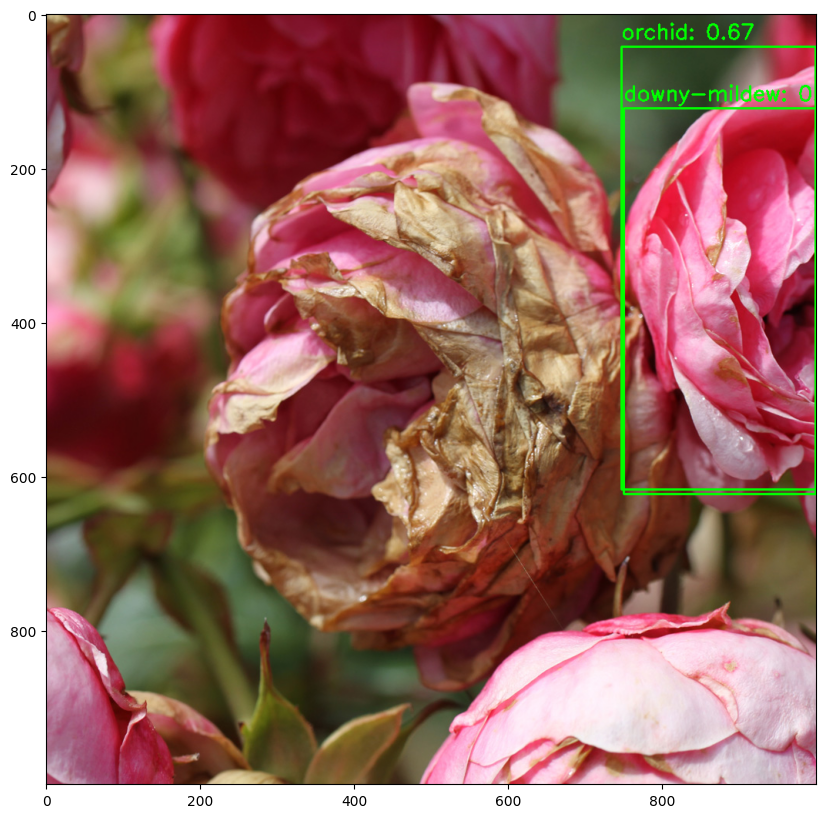

In [14]:
import cv2
import matplotlib.pyplot as plt


# Load the trained model. Replace with the actual path to your trained weights.
model_path = '/kaggle/working/runs/detect/train/weights/best.pt' # Update with the correct path to your trained weights
model = YOLO(model_path)

# Testing the Model
test_path = '/kaggle/working/disease_1.jpg'
results = model.predict(source=test_path, save=True, conf=0.25)

# Print the bounding boxes, confidence scores, and class names.
for r in results:
    print(r.boxes) # Print bounding box information
    print(r.boxes.conf) # Print confidence scores
    print(r.boxes.cls) # Print predicted classes

# Display the image with bounding boxes
img = cv2.imread(test_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert to RGB format

for r in results:
    for box in r.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        conf = box.conf[0]
        cls = int(box.cls[0])
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw bounding boxes
        text = f"{model.names[cls]}: {conf:.2f}"
        cv2.putText(img, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.show()

# Saving the Model for Deployment

In [15]:
#from google.colab import files

# Using h5 format

In [16]:
#model.save('florys.h5')

# Using saved_model format

In [17]:
#odel.export(format='saved_model')

In [18]:
#!zip -r saved_model.zip /kaggle/working/runs/detect/train/weights/best_saved_model

In [19]:
'''from IPython.display import FileLink
FileLink(r'saved_model.zip')'''

"from IPython.display import FileLink\nFileLink(r'saved_model.zip')"

# Using the TF.js format

In [20]:
#model.export(format = 'tfjs')

In [21]:
#!zip -r tfjs.zip /kaggle/working/runs/detect/train/weights/best_web_model

In [22]:
'''from IPython.display import FileLink
FileLink(r'tfjs.zip')'''

"from IPython.display import FileLink\nFileLink(r'tfjs.zip')"

## Using the TFLite format

In [23]:
#model.save('florys.tflite')

In [24]:
#model.export(format='tflite')

In [25]:
#FileLink(r'runs/detect/train/weights/best_saved_model/best_float32.tflite')

In [26]:
#files.download('/kaggle/working/runs/detect/train2/weights/best_saved_model/best_float32.tflite')

## (Optional) Using PyTorch

In [27]:
#model.save('florys.pt')

In [28]:
#files.download('/content/florys.pt')

## (Optional) Save to onnx File

In [29]:
#model.save('florys.onnx')

In [30]:
#model.export(format='onnx')

In [31]:
#FileLink(r'runs/detect/train/weights/best.onnx')

In [32]:
#files.download('/content/runs/detect/train2/weights/best.onnx')